In [1]:
# libraries
%load_ext autoreload
%autoreload 2

import numpy as np
import soundfile as sf
import sounddevice as sd
import matplotlib.pyplot as plt
import sys
%matplotlib inline

from scipy import signal, fft

from PDM2PCM import *
from PCM2PDM import *
from Serialize import *
from PlotSuite import *

In [ ]:
CIC(decimation_factor=4, stages=2, differential_delay=1).process(np.array([-1,-1,-1,1,1,1,1,-1,-1,1,-1,-1,1,1,1,-1])) # draw.io test run

In [38]:
"{" + f"%d, %d, %d, %d, %d, %d, %d, %d" % (tuple(cum_sum)) + "}\n"

'{1, 2, 3, 4, 5, 6, 7, 8}\n'

In [41]:
list_ = []
list_.append("char INTEG_LUT[256][8] = {\n")
for i in range(256):
    bit_stream = 2*np.unpackbits(np.array([np.uint8(i)]).view(dtype=np.uint8), axis=0).astype(np.int8)-1
    cum_sum = bit_stream.cumsum() 
    list_.append("    {" + f"%d, %d, %d, %d, %d, %d, %d, %d" % (tuple(cum_sum)) + "},\n")
list_.append("};")
lut = ''.join(list_)
with open("integ_lut.c", "w") as text_file: text_file.write(lut)

In [4]:
np.savetxt("python_cic_processed", cic_processed, fmt="%d")

C:\Users\levyg\AppData\Local\Temp/ipykernel_4808/3147669061.py:25: RuntimeWarning: divide by zero encountered in log10
  mag_comp_filt_db = 20*np.log10(mag_comp_filt)
C:\Users\levyg\AppData\Local\Temp/ipykernel_4808/3147669061.py:35: RuntimeWarning: divide by zero encountered in log10
  mag_cascaded_filt_db = 20*np.log10(mag_cascaded_filt)


SNR_1 = 42.273224, SNR_2 = 38.633878, SNR_3 = 49.255238


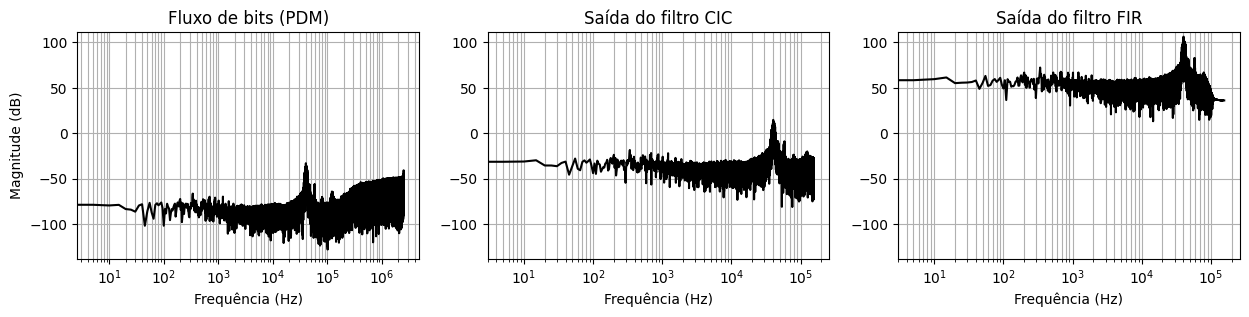

In [3]:
# wd = r"C:/Users/levyg/Documents/MEGA/Repositories/mems2sd_esp32/python/PDMSignalProcessing/data/"
# fname = "ultrasound_pdm_10_32bitsample_5000000hz"
wd = r"C:/Users/levyg/Documents/MEGA/Repositories/mems2sd_esp32/python/PDMSignalProcessing/PDM_C/"
fname = "clipped_data_bin"
fs_pdm = 5e6 # pdm sampling frequency
N = 2        # number of CIC stages
R = 16       # decimation rate
M = 1        # differential delay in the comb section stages of the filter
order = 64   # fir compensator order

data_pdm = np.fromfile(wd+fname, dtype=np.uint32)
pdm_stream = swap_bytes_of_word(data_pdm) # only necessary in Python

pdm_stream = pdm_stream.view(dtype=np.uint8).ravel()
pdm_stream = np.unpackbits(pdm_stream, axis=0).astype(np.int32)
# pdm_stream = 2*pdm_stream[-int(2e6):-int(1e6)]-1
pdm_stream = 2*pdm_stream-1
# pdm_stream = pdm_stream/np.max(pdm_stream)

fir_coeffs = cic_compensator_response(N=N, R=R, M=M, order=order, cutoff=90e3, att=300, fs=fs_pdm, freq_points=512, plot=False, lang='pt')
cic_processed = CIC(decimation_factor=R, stages=N, differential_delay=M).process(pdm_stream)
# # cic_processed = cic_processed/np.max(cic_processed)
fir_processed = np.convolve(cic_processed, fir_coeffs, mode='valid')
# # fir_processed = fir_processed/np.max(fir_processed)
pdm_cic_fir_plot(pdm_stream, cic_processed, fir_processed, fs_pdm, R, lang='pt')

834720

SNR_1 = 9.815292, SNR_2 = 3.416092, SNR_3 = 7.661064


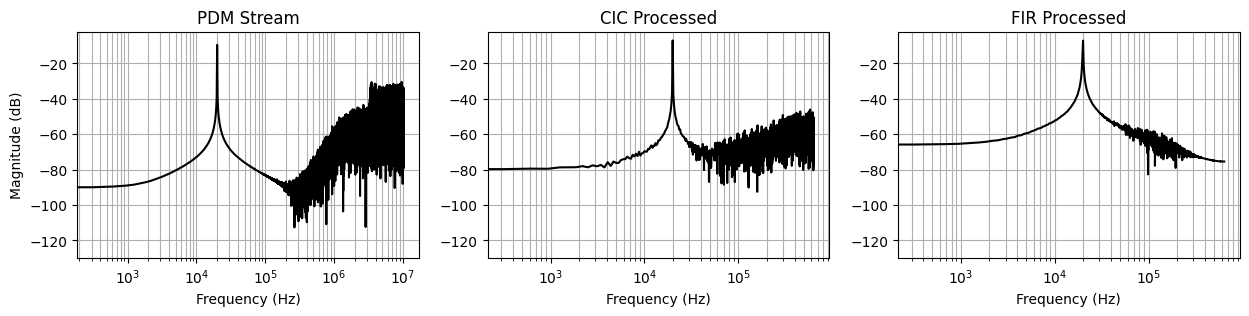

In [219]:
Fs = 20480000
N = 65537
pdm_stream = np.loadtxt('data/SD2.dat')

fir_coeffs = cic_compensator_response(N=4, R=16, M=2, order=16, cutoff=30e3, att=300, fs=Fs, freq_points=512, plot=False)
cic_processed = CIC().process(pdm_stream)
cic_processed = cic_processed/np.max(cic_processed)
fir_processed = np.convolve(cic_processed, fir_coeffs, mode='valid')
fir_processed = fir_processed/np.max(fir_processed)
pdm_cic_fir_plot(pdm_stream, cic_processed, fir_processed, Fs, 16)